**#0 Importy i wczytanie bazy**

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


**#1 Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?**

In [206]:
df['ManagerName'].unique()

array(['Brandon R. LeBlanc', 'John Smith', 'Lynn Daneault',
       'Brian Champaigne', 'Jennifer Zamora', 'Janet King', 'Simon Roup',
       'Eric Dougall', 'Peter Monroe', 'Board of Directors', 'Amy Dunn',
       'Brannon Miller', 'David Stanley', 'Elijiah Gray', 'Kelley Spirea',
       'Ketsia Liebig', 'Kissy Sullivan', 'Michael Albert',
       'Webster Butler', 'Debra Houlihan', 'Alex Sweetwater', nan],
      dtype=object)

In [207]:
df['ManagerID'].unique()

array([ 1., 17., 21., 13.,  5.,  2.,  4.,  6.,  7.,  9., 11., 12., 14.,
       16., 18., 19., 20., 22., 39., nan, 30., 15., 10.,  3.])

In [208]:
df['PerformanceScore'].unique()

array(['Fully Meets', 'PIP', 'Exceeds', 'Needs Improvement', nan],
      dtype=object)

In [209]:
#Zamiana -1 na NaN
df['ManagerID'] = df['ManagerID'].replace(-1, pd.NA)
#Usunięcie wierszy z NaN w ManagerID
df = df.dropna(subset=['ManagerID'])

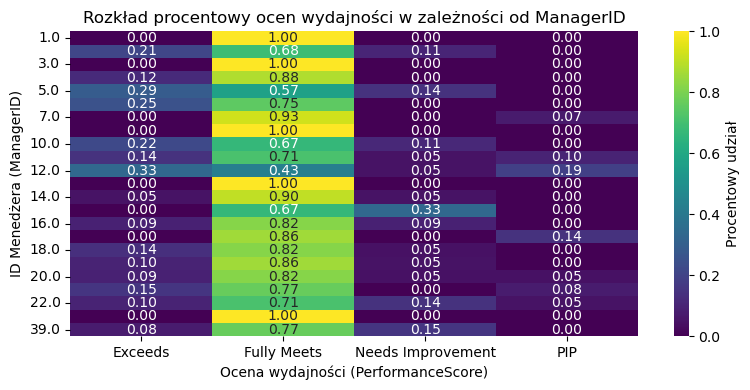

In [210]:
#Grupowanie i zliczanie ocen wydajności dla każdego Managera
performance_by_manager = df.groupby(['ManagerID', 'PerformanceScore']).size().reset_index(name='Count')

#Obliczenie sumy ocen dla każdego menedżera
total_counts = performance_by_manager.groupby('ManagerID')['Count'].transform('sum')

#Obliczenie procentowego udziału ocen
performance_by_manager['Percentage'] = performance_by_manager['Count'] / total_counts

#Przekształcenie danych do formatu pivot
performance_pivot = performance_by_manager.pivot(index='ManagerID', columns='PerformanceScore', values='Percentage').fillna(0)

#Wizualizacja heatmapy
plt.figure(figsize=(8, 4))
sns.heatmap(performance_pivot, cmap='viridis', annot=True, fmt='.2f', cbar_kws={'label': 'Procentowy udział'})
plt.title('Rozkład procentowy ocen wydajności w zależności od ManagerID')
plt.xlabel('Ocena wydajności (PerformanceScore)')
plt.ylabel('ID Menedżera (ManagerID)')
plt.tight_layout()
plt.show()

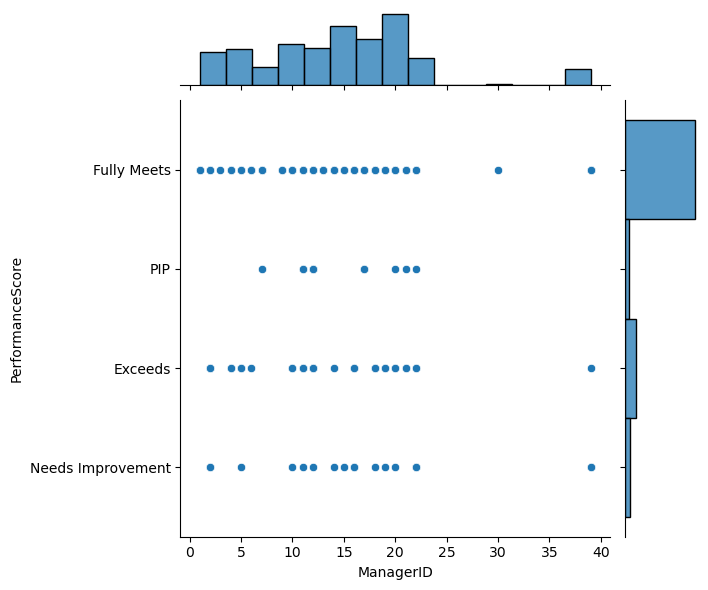

In [211]:
sns.jointplot(x = 'ManagerID', y = 'PerformanceScore', data = df)

**Na heatmapie widać, że 'Fully Meets' jest najczęściej pojawiającą się oceną wydajośći dla prawie każdego menadżera. Na podstawie wykresu sądzę, że istnieje zależność między przełożonym a wydajnością pracy pracownika. Ponieważ MenagerName jest ściśle powiązany z MenagerID uważam, że menadżerowie o numerze ID pomiędzy 0 a 20 wpływają na lepszą wydajność pracy pracownika**

**#2 Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?**

In [212]:
import datetime as dt

def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = pd.Timestamp('2019-09-27')
    else:
        end_date = pd.Timestamp(row['DateofTermination'])
    # Obliczanie liczby dni między datami i przeliczanie na lata
    return (end_date - pd.Timestamp(row['DateofHire'])).days / 365.25

In [213]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
df[['DateofHire','DateofTermination','Seniority','RecruitmentSource']].head()

,DateofHire,DateofTermination,Seniority,RecruitmentSource
0,10/27/2008,NaN,10.915811,Diversity Job Fair
1,1/6/2014,NaN,5.722108,Website Banner Ads
2,9/29/2014,NaN,4.993840,Internet Search
3,2/16/2015,04/15/15,0.158795,Pay Per Click - Google
4,5/1/2015,NaN,4.407940,Website Banner Ads


C:\Users\Mateusz\AppData\Local\Temp\ipykernel_608\1750997664.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recruitment_analysis, x='RecruitmentSource', y='AvgSeniority', palette='viridis')


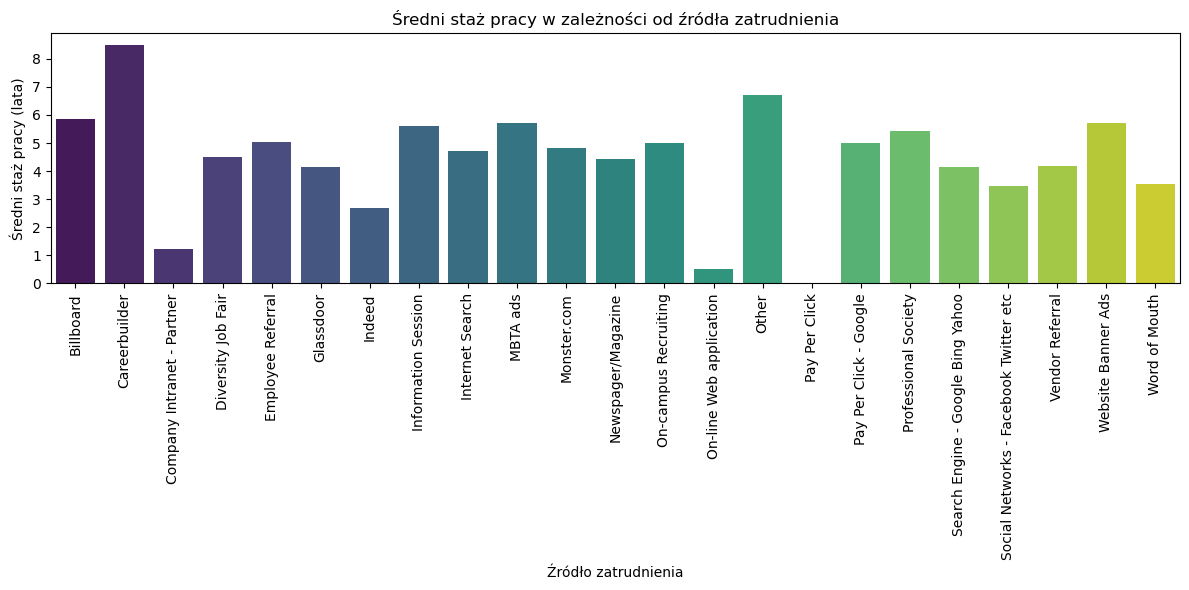

In [214]:
# Grupowanie danych po źródle zatrudnienia
recruitment_analysis = df.groupby('RecruitmentSource').agg(
    AvgSeniority=('Seniority', 'mean'),
    EmployeeCount=('Seniority', 'count')
).reset_index()

# Wykres 1: Średni staż pracy
plt.figure(figsize=(12, 6))
sns.barplot(data=recruitment_analysis, x='RecruitmentSource', y='AvgSeniority', palette='viridis')
plt.xticks(rotation=90)
plt.title('Średni staż pracy w zależności od źródła zatrudnienia')
plt.xlabel('Źródło zatrudnienia')
plt.ylabel('Średni staż pracy (lata)')
plt.tight_layout()
plt.show()

C:\Users\Mateusz\AppData\Local\Temp\ipykernel_608\1604732585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recruitment_analysis, x='RecruitmentSource', y='EmployeeCount', palette='viridis')


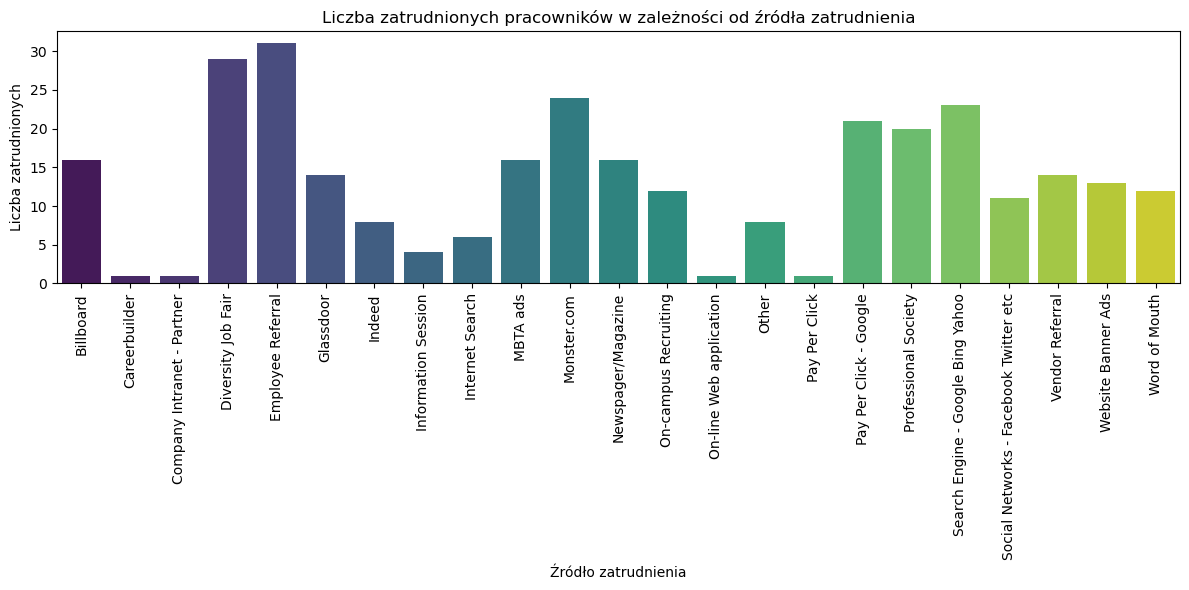

In [215]:
# Wykres 2: Liczba zatrudnionych pracowników
plt.figure(figsize=(12, 6))
sns.barplot(data=recruitment_analysis, x='RecruitmentSource', y='EmployeeCount', palette='viridis')
plt.xticks(rotation=90)
plt.title('Liczba zatrudnionych pracowników w zależności od źródła zatrudnienia')
plt.xlabel('Źródło zatrudnienia')
plt.ylabel('Liczba zatrudnionych')
plt.tight_layout()
plt.show()

**Na podstawie powyższych wykresów stwierdzam, że źródła zatrudnienia 'Diversity Job Fair' oraz 'Employee Referral' są najlepsze, jeżeli zależy nam na jak najdłuższym stażu pracowników**

**#3 Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?**

C:\Users\Mateusz\AppData\Local\Temp\ipykernel_608\520549550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='MaritalDesc', y='EmpSatisfaction', palette='bright')


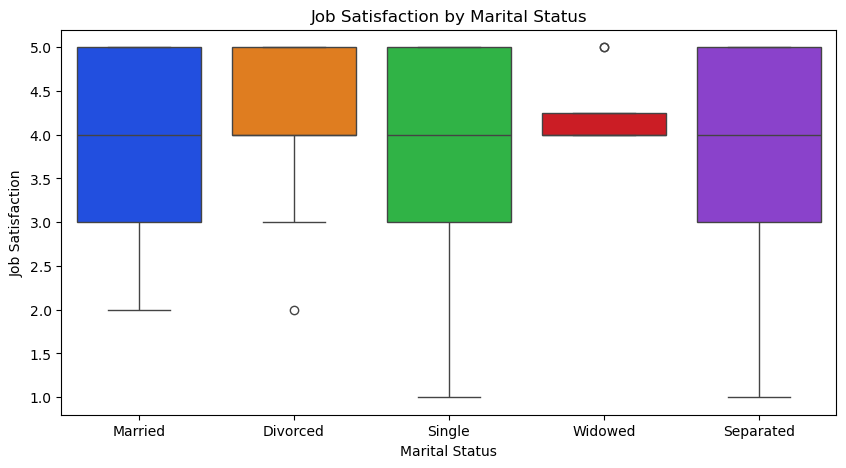

In [216]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='MaritalDesc', y='EmpSatisfaction', palette='bright')
plt.title('Job Satisfaction by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Job Satisfaction')
plt.show()

**Na podstawie wizualizacji nie wydaje się, aby istniał silny związek między stanem cywilnym a zadowoleniem z pracy, ponieważ większość grup ma podobne mediany i zakresy**

**#4 Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?**

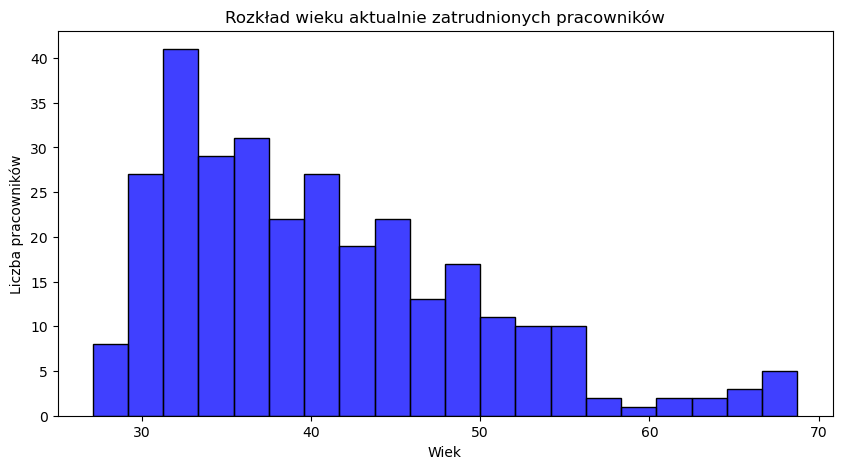

In [217]:
# Konwersja kolumny DOB na datetime z poprawą błędnych lat
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y', errors='coerce')

# Korekta lat z przyszłości
df.loc[df['DOB'] > pd.Timestamp('2019-09-27'), 'DOB'] -= pd.DateOffset(years=100)

# Funkcja do obliczania wieku
def calculate_age(row):
    current_date = pd.Timestamp('2019-09-27')
    if pd.isnull(row['DOB']):
        return None
    age = (current_date - row['DOB']).days / 365.25
    return age
    
df['Age'] = df.apply(calculate_age, axis=1)

# Histogram wieku
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, color='blue')
plt.title('Rozkład wieku aktualnie zatrudnionych pracowników')
plt.xlabel('Wiek')
plt.ylabel('Liczba pracowników')
plt.show()


**Struktura wieku pracowników przedstawiona jest na histogramie powyżej**

**#5 Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?**

C:\Users\Mateusz\AppData\Local\Temp\ipykernel_608\2712856240.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_projects_sum = df.groupby('AgeGroup')['SpecialProjectsCount'].sum().reset_index()
C:\Users\Mateusz\AppData\Local\Temp\ipykernel_608\2712856240.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_projects_sum, x='AgeGroup', y='SpecialProjectsCount', palette='viridis')


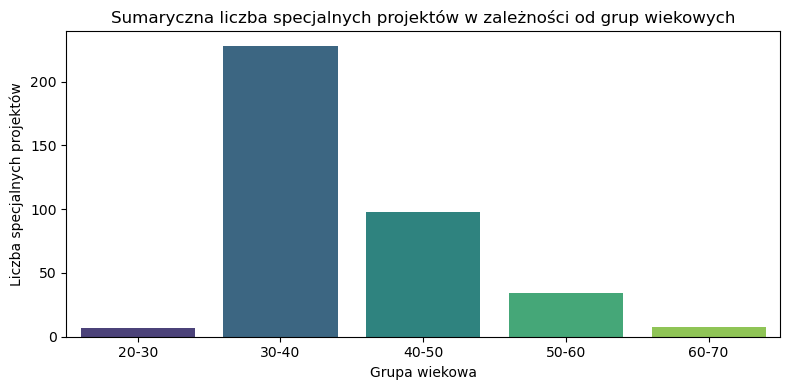

In [218]:
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']

# Tworzenie grup wiekowych
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Grupowanie danych i sumowanie liczby specjalnych projektów
age_group_projects_sum = df.groupby('AgeGroup')['SpecialProjectsCount'].sum().reset_index()

# Wykres sumarycznej liczby projektów w zależności od grup wiekowych
plt.figure(figsize=(8, 4))
sns.barplot(data=age_group_projects_sum, x='AgeGroup', y='SpecialProjectsCount', palette='viridis')
plt.title('Sumaryczna liczba specjalnych projektów w zależności od grup wiekowych')
plt.xlabel('Grupa wiekowa')
plt.ylabel('Liczba specjalnych projektów')
plt.tight_layout()
plt.show()


**Na podstawie powyższego wykresu nie można stwierdzić, że starsi pracownicy pracują nad większą liczbą specjalnych projektów**